In [185]:
# 減資暫停交易
cap_reduction = ["3117", "3432", "6276", "3308", "1538", "3025", "3018", "4946", "2726", "2535", "3149", "1423", "1236",
                 "1776", "2489", "4994", "6228", "1805", "9945", "8499", "5240", "5529", "5345", "2107", "4961", "3321",
                 "1441", "3481", "2022", "3259", "2614", "6219", "4192", "5701", "4960", "4943", "1512", "6541", "6103"]
'''
                 ,
                 "4419", "8067", "2321", "3085", "8077", "4903", "3043", "6271", "1449", "3093", "2477", "5314", "6225",
                 "1806", "6207", "2390", "8390", "2327", "1316", "3095", "6194", "2323", "1810"]
'''

# 違規
violation = ["2443", "4806", "8080", "3073", "4414"]
cap_reduction = cap_reduction + violation

### 主要資料抓取

In [107]:
# Import
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Process
info = pd.read_csv(r"C:\Users\User\Downloads\RR.csv", header = None)
info = info[0].str.split(" ", expand=True)
info.columns = ["Date", "Ticker", "Close", "Drop"]
info["Date"] = info["Date"].astype(str).str.slice(0, 8)
info["Date"] = pd.to_datetime(info["Date"], format='%Y%m%d')
info["Ticker"] = info["Ticker"].astype(str).str.slice(0, 4)
info["Close"] = info["Close"].astype(float)
info = info.drop(["Drop"], axis=1)

var_for_date = info[info["Ticker"] == "2330"]
date_list = list(var_for_date["Date"]) # 138


In [115]:
target = []
empty_list = pd.DataFrame()

In [190]:
# Import
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Process
info = pd.read_csv(r"C:\Users\User\Downloads\RR.csv", header = None)
info = info[0].str.split(" ", expand=True)
info.columns = ["Date", "Ticker", "Close", "Drop"]
info["Date"] = info["Date"].astype(str).str.slice(0, 8)
info["Date"] = pd.to_datetime(info["Date"], format='%Y%m%d')
info["Ticker"] = info["Ticker"].astype(str).str.slice(0, 4)
info["Close"] = info["Close"].astype(float)
info = info.drop(["Drop"], axis=1)

filtered = info[info["Ticker"] == "2330"]
date_list = list(filtered["Date"]) # 138

# Main
target = []
# empty_list = pd.DataFrame()
for i in range(174, 200):
    d_0 = date_list[-1-i]; d_5 = date_list[-5-i]; d_10 = date_list[-10-i]; d_20 = date_list[-20-i]; d_60 = date_list[-60-i]; d_120 = date_list[-120-i]; d_240 = date_list[-240-i]
    
    # ticker_list: 240個交易日前就有資料的股票
    filtered_1 = info[info["Date"] == d_240]
    ticker_list_1 = list(filtered_1["Ticker"])
    filtered_2 = info[info["Date"] == d_0]
    ticker_list_2 = list(filtered_2["Ticker"])
    ticker_list = [tickers for tickers in ticker_list_1 if tickers in ticker_list_2]
    ticker_list = [tickers for tickers in ticker_list if tickers not in cap_reduction]
    
    per_5 = []; per_10 = []; per_20 = []; per_60 = []; per_120 = []; per_240 = []
    price_data = info[(info["Ticker"].isin(ticker_list)) & (info["Date"].isin([d_0, d_5, d_10, d_20, d_60, d_120,d_240]))]
    
    for ticker in ticker_list:
        ticker_data = price_data[price_data["Ticker"] == ticker]
        price_0 = ticker_data[ticker_data["Date"] == d_0]["Close"].values[0]

        try:
            price_5 = ticker_data[ticker_data["Date"] == d_5]["Close"].values[0]
            per_5.append(round((price_0 - price_5) / price_5, 5))
        except:
            print(ticker, d_5)
            break
    
        try:
            price_10 = ticker_data[ticker_data["Date"] == d_10]["Close"].values[0]
            per_10.append(round((price_0 - price_10) / price_10, 5))
        except:
            print(ticker, d_10)
            break
    
        try:
            price_20 = ticker_data[ticker_data["Date"] == d_20]["Close"].values[0]
            per_20.append(round((price_0 - price_20) / price_20, 5))
        except:
            print(ticker, d_20)
            break
        
        try:
            price_60 = ticker_data[ticker_data["Date"] == d_60]["Close"].values[0]
            per_60.append(round((price_0 - price_60) / price_60, 5))
        except:
            print(ticker, d_60)
            break
        
        try:
            price_120 = ticker_data[ticker_data["Date"] == d_120]["Close"].values[0]
            per_120.append(round((price_0 - price_120) / price_120, 5))
        except:
            print(ticker, d_120)
            break
        
        try:
            price_240 = ticker_data[ticker_data["Date"] == d_240]["Close"].values[0]
            per_240.append(round((price_0 - price_240) / price_240, 5))
        except:
            print(ticker, d_240)
            break
        
    rs_5 = [round(((sorted(per_5).index(x) + 1) / len(per_5) * 100), 2) for x in per_5]
    rs_10 = [round(((sorted(per_10).index(x) + 1) / len(per_10) * 100), 2) for x in per_10]
    rs_20 = [round(((sorted(per_20).index(x) + 1) / len(per_20) * 100), 2) for x in per_20]
    rs_60 = [round(((sorted(per_60).index(x) + 1) / len(per_60) * 100), 2) for x in per_60]
    rs_120 = [round(((sorted(per_120).index(x) + 1) / len(per_120) * 100), 2) for x in per_120]
    rs_240 = [round(((sorted(per_240).index(x) + 1) / len(per_240) * 100), 2) for x in per_240]

    date = [d_0]*len(rs_5)
    df = pd.DataFrame({
        "Date": date,
        "Ticker": ticker_list,
        "RS_5": rs_5,
        "RS_10": rs_10,
        "RS_20": rs_20,
        "RS_60": rs_60,
        "RS_120": rs_120,
        "RS_240": rs_240
    })
    name = str(date[-1])[:10]
    df.to_csv(name)
    print(name, i+1, end="\n")
    empty_list = pd.concat([empty_list, df], axis=0, ignore_index=True) # 145 7-10

2023-05-25 175
2023-05-24 176
2023-05-23 177
2023-05-22 178
2023-05-19 179
2023-05-18 180
2023-05-17 181
2023-05-16 182
2023-05-15 183
2023-05-12 184
2023-05-11 185
2023-05-10 186
2023-05-09 187
2023-05-08 188
2023-05-05 189
2023-05-04 190
2023-05-03 191
2023-05-02 192
2023-04-28 193
2023-04-27 194
2023-04-26 195
2023-04-25 196
2023-04-24 197
2023-04-21 198
2023-04-20 199
2023-04-19 200


In [191]:
empty_list

,Date,Ticker,RS_5,RS_10,RS_20,RS_60,RS_120,RS_240
0,2024-02-02,9958,4.81,86.61,94.09,93.68,94.09,94.43
1,2024-02-02,9960,67.88,46.43,43.94,50.67,37.91,42.96
2,2024-02-02,9962,32.41,33.28,34.72,47.30,52.17,19.30
3,2024-02-02,6664,7.25,10.72,21.04,4.35,16.52,80.06
4,2024-02-02,6666,38.55,51.59,63.54,19.59,11.42,4.17
...,...,...,...,...,...,...,...,...
342076,2023-04-19,3287,81.04,82.36,74.21,54.53,56.03,37.43
342077,2023-04-19,3288,53.03,28.37,16.98,6.60,10.20,93.28
342078,2023-04-19,3289,21.54,76.30,13.68,72.35,71.03,93.58
342079,2023-04-19,3290,4.68,4.20,22.62,81.82,82.30,80.62


In [192]:
empty_list.to_csv("RS_200", index=False)

### 新增資料(改迴圈數)

In [58]:
existing = pd.read_csv(r"C:\Users\User\Downloads\RS_Data.csv", header = None)
new = pd.read_csv(r"C:\Users\User\Downloads\new.csv", header = None)
info = pd.concat([existing, new], axis=0, ignore_index=True)

info = info[0].str.split(" ", expand=True)
info.columns = ["Date", "Ticker", "Close", "Drop"]
info["Date"] = info["Date"].astype(str).str.slice(0, 8)
info["Date"] = pd.to_datetime(info["Date"], format='%Y%m%d')
info["Ticker"] = info["Ticker"].astype(str).str.slice(0, 4)
info["Close"] = info["Close"].astype(float)
info = info.drop(["Drop"], axis=1)

filtered = info[info["Ticker"] == "2330"]
date_list = list(filtered["Date"]) # 138

# Main
target = []
empty_list = pd.DataFrame()
for i in range(1):
    d_0 = date_list[-1-i]; d_5 = date_list[-5-i]; d_10 = date_list[-10-i]; d_20 = date_list[-20-i]; d_60 = date_list[-60-i]
    
    filtered_1 = info[info["Date"] == d_60]
    ticker_list_1 = list(filtered_1["Ticker"])
    filtered_2 = info[info["Date"] == d_0]
    ticker_list_2 = list(filtered_2["Ticker"])
    ticker_list = [tickers for tickers in ticker_list_1 if tickers in ticker_list_2]
    ticker_list = [tickers for tickers in ticker_list if tickers not in cap_reduction]
    
    per_5 = []; per_10 = []; per_20 = []; per_60 = []
    price_data = info[(info["Ticker"].isin(ticker_list)) & (info["Date"].isin([d_0, d_5, d_10, d_20, d_60]))]
    
    for ticker in ticker_list:
        ticker_data = price_data[price_data["Ticker"] == ticker]
        price_0 = ticker_data[ticker_data["Date"] == d_0]["Close"].values[0]

        price_5 = ticker_data[ticker_data["Date"] == d_5]["Close"].values[0]
        per_5.append(round((price_0 - price_5) / price_5, 5))
    
        price_10 = ticker_data[ticker_data["Date"] == d_10]["Close"].values[0]
        per_10.append(round((price_0 - price_10) / price_10, 5))
    
        price_20 = ticker_data[ticker_data["Date"] == d_20]["Close"].values[0]
        per_20.append(round((price_0 - price_20) / price_20, 5))
    
        price_60 = ticker_data[ticker_data["Date"] == d_60]["Close"].values[0]
        per_60.append(round((price_0 - price_60) / price_60, 5))
        
    rs_5 = [round(((sorted(per_5).index(x) + 1) / len(per_5) * 100), 2) for x in per_5]
    rs_10 = [round(((sorted(per_10).index(x) + 1) / len(per_10) * 100), 2) for x in per_10]
    rs_20 = [round(((sorted(per_20).index(x) + 1) / len(per_10) * 100), 2) for x in per_20]
    rs_60 = [round(((sorted(per_60).index(x) + 1) / len(per_10) * 100), 2) for x in per_60]

    date = [d_0]*len(rs_5)
    df = pd.DataFrame({
        "Date": date,
        "Ticker": ticker_list,
        "RS_5": rs_5,
        "RS_10": rs_10,
        "RS_20": rs_20,
        "RS_60": rs_60
    })
    # name = str(date[-1])[:10]
    # df.to_csv(name)
    # print(name, i+1, end="\n")
    empty_list = pd.concat([empty_list, df], axis=0, ignore_index=True)

empty_list["Date"] = empty_list["Date"].astype(str)
empty_list["Ticker"] = empty_list["Ticker"].astype(str)
existing = pd.read_csv("RS資料.csv")
total = pd.concat([empty_list, existing], axis=0, ignore_index=True)

total.to_csv("RS資料.csv", index=False) # Date: str, Ticker: int

In [73]:
total["Ticker"] = total["Ticker"].astype(str)

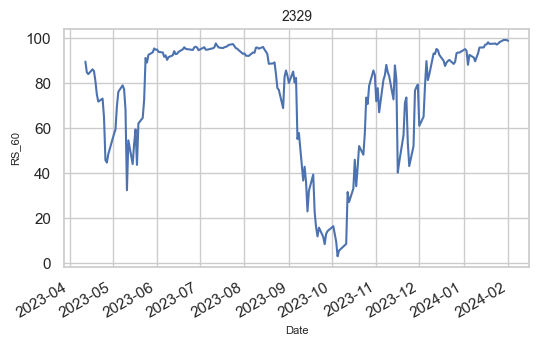

In [94]:
import seaborn as sb

df = total[total["Ticker"] == "6643"].reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

sb.set_theme(style="whitegrid")

plt.figure(figsize=(6, 3.5))
sb.lineplot(data=df, x='Date', y='RS_60', )

plt.title('2329', fontsize=10)
plt.xlabel('Date', fontsize=8)
plt.ylabel('RS_60', fontsize=8)

plt.gcf().autofmt_xdate()

plt.show()

In [68]:
total

,Date,Ticker,RS_5,RS_10,RS_20,RS_60
0,2024-02-01,9962,31.86,36.80,45.43,70.70
1,2024-02-01,6666,26.75,46.68,41.23,43.50
2,2024-02-01,6667,96.82,96.76,97.05,98.64
3,2024-02-01,6668,83.70,2.04,80.18,23.34
4,2024-02-01,6669,88.70,91.31,86.77,95.80
...,...,...,...,...,...,...
354463,2023-04-12,2301,33.31,63.44,31.23,64.02
354464,2023-04-12,2302,74.45,84.24,91.89,86.56
354465,2023-04-12,2303,11.41,15.70,22.65,80.94
354466,2023-04-12,2305,47.28,11.01,18.31,8.52


In [49]:
type(total["Date"][354467])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
existing = pd.read_csv("RS_Data.csv")
new = pd.read_csv(r"C:\Users\User\Downloads\new.csv", header = None)
new = new[0].str.split(" ", expand=True)
new.columns = ["Date", "Ticker", "Close", "Drop"]
new["Date"] = new["Date"].astype(str).str.slice(0, 8)
new["Date"] = pd.to_datetime(new["Date"], format='%Y%m%d')
new["Ticker"] = new["Ticker"].astype(str).str.slice(0, 4)
new["Close"] = new["Close"].astype(float)
new = new.drop(["Drop"], axis=1)
new

,Date,Ticker,Close
0,2024-01-15,9960,26.80
1,2024-01-16,9960,26.70
2,2024-01-17,9960,26.55
3,2024-01-18,9960,26.70
4,2024-01-19,9960,26.70
...,...,...,...
50403,2024-01-26,2726,27.10
50404,2024-01-29,2726,27.20
50405,2024-01-30,2726,26.85
50406,2024-01-31,2726,26.85


### Test

In [35]:
empty_list

,Date,Ticker,RS_5,RS_10,RS_20,RS_60
0,2024-01-26,9962,58.46,59.37,61.60,54.06
1,2024-01-26,6666,76.91,74.00,72.97,29.49
2,2024-01-26,6667,73.37,93.31,56.57,98.11
3,2024-01-26,6668,4.46,71.20,21.09,92.00
4,2024-01-26,6669,4.00,96.57,95.49,88.86
...,...,...,...,...,...,...
347423,2023-04-12,2301,33.31,63.44,31.23,64.02
347424,2023-04-12,2302,74.45,84.24,91.89,86.56
347425,2023-04-12,2303,11.41,15.70,22.65,80.94
347426,2023-04-12,2305,47.28,11.01,18.31,8.52


In [44]:
empty_list.to_csv("RS_200日.csv", index=False)

In [1]:
import pandas as pd

In [2]:
a = pd.read_csv("RS_200日.csv")

In [3]:
a

,Date,Ticker,RS_5,RS_10,RS_20,RS_60
0,2024-01-26,9962,58.46,59.37,61.60,54.06
1,2024-01-26,6666,76.91,74.00,72.97,29.49
2,2024-01-26,6667,73.37,93.31,56.57,98.11
3,2024-01-26,6668,4.46,71.20,21.09,92.00
4,2024-01-26,6669,4.00,96.57,95.49,88.86
...,...,...,...,...,...,...
347423,2023-04-12,2301,33.31,63.44,31.23,64.02
347424,2023-04-12,2302,74.45,84.24,91.89,86.56
347425,2023-04-12,2303,11.41,15.70,22.65,80.94
347426,2023-04-12,2305,47.28,11.01,18.31,8.52


In [16]:
a[a["Ticker"] == 6139].head(25).reset_index(drop=True)

,Date,Ticker,RS_5,RS_10,RS_20,RS_60
0,2024-01-26,6139,66.40,5.54,20.86,82.40
1,2024-01-25,6139,12.91,12.74,47.54,84.29
2,2024-01-24,6139,4.86,85.13,84.28,91.02
3,2024-01-23,6139,9.26,63.75,78.67,87.94
4,2024-01-22,6139,3.72,9.09,80.16,84.68
5,2024-01-19,6139,8.69,47.68,85.42,89.48
6,2024-01-18,6139,71.34,84.27,93.25,90.56
7,2024-01-17,6139,93.42,81.58,89.13,90.05
8,2024-01-16,6139,92.05,84.10,88.67,92.45
9,2024-01-15,6139,77.97,90.96,92.28,96.17


---------------------------------------------------------------------

### Import

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Data Process

In [7]:
info = pd.read_csv(r"C:\Users\User\Downloads\RS_Data.csv", header = None)

info = info[0].str.split(" ", expand=True)
info.columns = ["Date", "Ticker", "Close", "Drop"]
info["Date"] = info["Date"].astype(str).str.slice(0, 8)
info["Date"] = pd.to_datetime(info["Date"], format='%Y%m%d')
info["Ticker"] = info["Ticker"].astype(str).str.slice(0, 4)
info["Close"] = info["Close"].astype(float)
info = info.drop(["Drop"], axis=1)

In [8]:
info # 暫停交易不影響

,Date,Ticker,Close
0,2021-12-17,9962,19.30
1,2021-12-20,9962,18.90
2,2021-12-21,9962,19.05
3,2021-12-22,9962,18.65
4,2021-12-23,9962,18.50
...,...,...,...
903449,2024-01-22,2308,291.00
903450,2024-01-23,2308,293.50
903451,2024-01-24,2308,289.00
903452,2024-01-25,2308,284.00


In [13]:
filtered = info[info["Ticker"] == "2330"]
date_list = list(filtered["Date"]) # 138

In [15]:
len(date_list)

514

In [12]:
len(info[info["Date"] == "2022-01-03"])

1714

In [122]:
filtered_1 = info[info["Date"] == "2023-11-01"]
ticker_list_1 = list(filtered_1["Ticker"]) # 1783
filtered_2 = info[info["Date"] == "2024-01-26"]
ticker_list_2 = list(filtered_2["Ticker"]) # 1801
ticker_list = [tickers for tickers in ticker_list_1 if tickers in ticker_list_2] # 確保沒有下市股 # 1783
ticker_list.remove("3432")

filtered = info[info["Ticker"] == "2330"]
date_list = list(filtered["Date"]) # 138

In [8]:
date_list

[Timestamp('2023-07-12 00:00:00'),
 Timestamp('2023-07-13 00:00:00'),
 Timestamp('2023-07-14 00:00:00'),
 Timestamp('2023-07-17 00:00:00'),
 Timestamp('2023-07-18 00:00:00'),
 Timestamp('2023-07-19 00:00:00'),
 Timestamp('2023-07-20 00:00:00'),
 Timestamp('2023-07-21 00:00:00'),
 Timestamp('2023-07-24 00:00:00'),
 Timestamp('2023-07-25 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-07-27 00:00:00'),
 Timestamp('2023-07-28 00:00:00'),
 Timestamp('2023-07-31 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-08-02 00:00:00'),
 Timestamp('2023-08-04 00:00:00'),
 Timestamp('2023-08-07 00:00:00'),
 Timestamp('2023-08-08 00:00:00'),
 Timestamp('2023-08-09 00:00:00'),
 Timestamp('2023-08-10 00:00:00'),
 Timestamp('2023-08-11 00:00:00'),
 Timestamp('2023-08-14 00:00:00'),
 Timestamp('2023-08-15 00:00:00'),
 Timestamp('2023-08-16 00:00:00'),
 Timestamp('2023-08-17 00:00:00'),
 Timestamp('2023-08-18 00:00:00'),
 Timestamp('2023-08-21 00:00:00'),
 Timestamp('2023-08-

In [9]:
d_0 = date_list[-1]
d_5 = date_list[-5]
d_10 = date_list[-10]
d_20 = date_list[-20]
d_60 = date_list[-60]

### Main

In [18]:
per_5 = []; per_10 = []; per_20 = []; per_60 = []

In [19]:
price_data = info[(info["Ticker"].isin(ticker_list)) & (info["Date"].isin([d_0, d_5, d_10, d_20, d_60]))]

for ticker in ticker_list:
    ticker_data = price_data[price_data["Ticker"] == ticker]
    price_0 = ticker_data[ticker_data["Date"] == d_0]["Close"].values[0]

    price_5 = ticker_data[ticker_data["Date"] == d_5]["Close"].values[0]
    per_5.append(round((price_0 - price_5) / price_5, 5))
    
    price_10 = ticker_data[ticker_data["Date"] == d_10]["Close"].values[0]
    per_10.append(round((price_0 - price_10) / price_10, 5))
    
    price_20 = ticker_data[ticker_data["Date"] == d_20]["Close"].values[0]
    per_20.append(round((price_0 - price_20) / price_20, 5))
    
    price_60 = ticker_data[ticker_data["Date"] == d_60]["Close"].values[0]
    per_60.append(round((price_0 - price_60) / price_60, 5))

In [87]:
rs_5 = [round(((sorted(per_5).index(x) + 1) / len(per_5) * 100), 2) for x in per_5]
rs_10 = [round(((sorted(per_10).index(x) + 1) / len(per_10) * 100), 2) for x in per_10]
rs_20 = [round(((sorted(per_20).index(x) + 1) / len(per_10) * 100), 2) for x in per_20]
rs_60 = [round(((sorted(per_60).index(x) + 1) / len(per_10) * 100), 2) for x in per_60]

In [117]:
date = [d_0]*len(rs_5)

In [120]:
rs_0126 = pd.DataFrame({
    "Date": date,
    "Ticker": ticker_list,
    "RS_5": rs_5,
    "RS_10": rs_10,
    "RS_20": rs_20,
    "RS_60": rs_60
})

In [121]:
rs_0126

,Date,Ticker,RS_5,RS_10,RS_20,RS_60
0,2024-01-26,9962,58.47,59.43,61.45,53.93
1,2024-01-26,5543,53.48,33.05,70.09,5.84
2,2024-01-26,5546,64.48,58.42,25.20,2.08
3,2024-01-26,5601,24.97,44.05,73.18,62.51
4,2024-01-26,5603,76.43,75.36,81.09,74.80
...,...,...,...,...,...,...
1777,2024-01-26,2451,83.00,65.54,53.37,57.46
1778,2024-01-26,2453,6.79,60.61,80.42,71.10
1779,2024-01-26,2454,75.76,78.23,11.05,64.14
1780,2024-01-26,2455,63.64,61.90,0.28,2.81


In [11]:
rs_0126[rs_0126["Ticker"] == "2329"]

NameError: name 'rs_0126' is not defined

### Group

In [113]:
網通 = ["6285", "3596", "5388", "4906", "3694"]
神盾 = ["6462", "8054", "6684", "6237", "6243", "6695"]
光學 = ["3008", "3406", "3504", "3362", "3019"]
test = rs_0126[rs_0126["Ticker"].isin(網通)].reset_index(drop=True)

In [112]:
test

,Ticker,RS_5,RS_10,RS_20,RS_60
0,3596,10.38,53.82,66.61,42.31
1,3694,98.93,97.70,95.79,98.20
2,4906,13.08,61.90,76.21,43.21
3,5388,42.03,50.73,29.46,67.90
4,6285,61.34,8.42,12.74,51.74
